# Explore *hatecrime.csv*
Questions:
- How has the number of hate crimes changed over the years?
- What are the proportions of bias of reported incidents each year?
    - Within each bias category, bias against which group is most prevalent?
- In each state, which bias category are most prevalent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load clean_hatecrime.csv
hc = pd.read_csv("./../datasets/clean_hate_crime.csv")

C:\Users\tammi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### How has the number of hate crimes changed over the years?

In [3]:
num_hc = pd.DataFrame(hc.groupby("year")["incident_id"].count())
num_hc.reset_index(inplace = True)
num_hc.columns = ["year","num_incidents"]
num_hc

,year,num_incidents
0,1991,4589
1,1992,6667
2,1993,7608
3,1994,5954
4,1995,7950
5,1996,8790
6,1997,8107
7,1998,7902
8,1999,7944
9,2000,8219


[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Number of Hate Crime Incidents'),
 Text(0.5, 1.0, 'Total Number of Hate Crimes in the U.S. Between 1991-2020')]

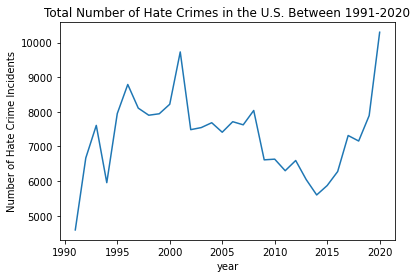

In [4]:
# Reported hate crime incidence from 1991-2020
num_hc_plot = sns.lineplot(data = num_hc, x = "year", y = "num_incidents")
num_hc_plot.set(xlabel = "year", ylabel = "Number of Hate Crime Incidents",
                title = "Total Number of Hate Crimes in the U.S. Between 1991-2020")
#plt.savefig("US_num_hc_plot.png")

**Interpretation: The number of reported incidents have gone down since 2000's but is on the rise again since 2015.**

### What are the proportions of bias of reported incidents each year?

In [5]:
# Gather what type of biases are recorded
biases = []
for bias in hc["bias_desc"]:
    if ";" not in bias and bias not in biases:
        biases.append(bias)
    elif ";" in bias:
        # Take into account when multiple biases recorded
        sub_biases = bias.split(";")
        for sub_bias in sub_biases:
            if sub_bias not in biases:
                biases.append(sub_bias)    
biases

['Anti-Black or African American',
 'Anti-White',
 'Anti-Jewish',
 'Anti-Arab',
 'Anti-Protestant',
 'Anti-Other Religion',
 'Anti-Islamic (Muslim)',
 'Anti-Gay (Male)',
 'Anti-Asian',
 'Anti-Catholic',
 'Anti-Heterosexual',
 'Anti-Hispanic or Latino',
 'Anti-Other Race/Ethnicity/Ancestry',
 'Anti-Multiple Religions, Group',
 'Anti-Multiple Races, Group',
 'Anti-Lesbian (Female)',
 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
 'Anti-American Indian or Alaska Native',
 'Anti-Atheism/Agnosticism',
 'Anti-Bisexual',
 'Anti-Physical Disability',
 'Anti-Mental Disability',
 'Anti-Gender Non-Conforming',
 'Anti-Female',
 'Anti-Transgender',
 'Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Male',
 "Anti-Jehovah's Witness",
 'Anti-Mormon',
 'Anti-Buddhist',
 'Anti-Sikh',
 'Anti-Other Christian',
 'Anti-Hindu',
 'Anti-Eastern Orthodox (Russian, Greek, Other)',
 "Unknown (offender's motivation not known)"]

In [6]:
# Create bias categories: race/ethnicity (race/ethn), "sex", "lgbt", "religion", "disability", "other"
bias_cat_dic = {"race/ethn": ['Anti-Black or African American', 'Anti-White','Anti-Arab',
                              'Anti-Asian', 'Anti-Hispanic or Latino','Anti-Other Race/Ethnicity/Ancestry',
                              'Anti-Multiple Races, Group', 'Anti-American Indian or Alaska Native',
                              'Anti-Native Hawaiian or Other Pacific Islander',
                              'Anti-Eastern Orthodox (Russian, Greek, Other)'],
               "sex": ['Anti-Female', 'Anti-Male'],
               "lgbt": ['Anti-Gay (Male)','Anti-Heterosexual','Anti-Lesbian (Female)',
                        'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)','Anti-Bisexual',
                       'Anti-Gender Non-Conforming','Anti-Transgender',],
               "religion":['Anti-Jewish','Anti-Protestant','Anti-Other Religion','Anti-Islamic (Muslim)',
                          'Anti-Catholic','Anti-Multiple Religions, Group','Anti-Atheism/Agnosticism', 
                           "Anti-Jehovah's Witness",'Anti-Mormon','Anti-Buddhist','Anti-Sikh',
                           'Anti-Other Christian','Anti-Hindu',],
               "disability":['Anti-Physical Disability','Anti-Mental Disability'],
               "other":["Unknown (offender's motivation not known)"]}

In [7]:
# ID what bias category each hate crime incidence is and add to dataframe
bias_cat = []
for bias in hc["bias_desc"]:
    if ";" not in bias:
        for key in bias_cat_dic:
            bias_lst = bias_cat_dic[key]
            if bias in bias_lst:
                bias_cat.append(key)
                break
    elif ";" in bias:
        # for incidents with more than one biases (these bias_cat begins with "mix")
        sub_biases = bias.split(";")
        temp_cat = "mix"
        for sub_bias in sub_biases:
            for key in bias_cat_dic:
                bias_lst = bias_cat_dic[key]
                if sub_bias in bias_lst:
                    temp_cat = temp_cat + "," + key
                    break
        bias_cat.append(temp_cat)

In [8]:
# Add bias category to dataframe
hc["bias_cat"] = bias_cat

In [9]:
# hc without mix bias
nomix_hc = hc[~hc["bias_cat"].str.contains("mix")]
nomix_hc

,Unnamed: 0,incident_id,year,pub_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias,bias_cat
0,0,3015,1991,Rogers,City,AR,Arkansas,West South Central,South,5,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn
1,1,3016,1991,Hope,City,AR,Arkansas,West South Central,South,6,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,race/ethn
2,2,43,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,race/ethn
3,3,44,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,race/ethn
4,4,3017,1991,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,race/ethn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219552,219572,1318026,2020,Sheridan,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,2,Intimidation,2.0,Park/Playground,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S,lgbt
219553,219573,1142103,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Unknown,1,Destruction/Damage/Vandalism of Property,0.0,Park/Playground,Anti-White,Government,S,S,race/ethn
219554,219574,1318018,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S,race/ethn
219555,219575,1318022,2020,Evanston,City,WY,Wyoming,Mountain,West,5,...,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S,sex


In [10]:
# Create num bias category each year (all, including mix)
num_bias_hc = pd.DataFrame(hc.groupby(["year","bias_cat"])["incident_id"].count())
num_bias_hc.reset_index(inplace = True)
num_bias_hc.columns = ["year", "bias_cat", "num_bias_cat"]
num_bias_hc["prop_bias"] = num_bias_hc["num_bias_cat"]/num_bias_hc.groupby("year")["num_bias_cat"].transform("sum")
num_bias_hc

,year,bias_cat,num_bias_cat,prop_bias
0,1991,lgbt,405,0.088255
1,1991,"mix,lgbt,race/ethn",2,0.000436
2,1991,"mix,lgbt,religion",1,0.000218
3,1991,"mix,race/ethn,lgbt",2,0.000436
4,1991,"mix,race/ethn,race/ethn",2,0.000436
...,...,...,...,...
337,2020,"mix,sex,race/ethn",4,0.000388
338,2020,"mix,sex,religion",1,0.000097
339,2020,race/ethn,6564,0.637343
340,2020,religion,1556,0.151083


**Since so few mix bias_cat, omitting it below for further analysis**

In [11]:
# Create num bias category each year (no mix)
num_bias_hc = pd.DataFrame(nomix_hc.groupby(["year","bias_cat"])["incident_id"].count())
num_bias_hc.reset_index(inplace = True)
num_bias_hc.columns = ["year", "bias_cat", "num_bias_cat"]
num_bias_hc["prop_bias"] = num_bias_hc["num_bias_cat"]/num_bias_hc.groupby("year")["num_bias_cat"].transform("sum")
num_bias_hc

,year,bias_cat,num_bias_cat,prop_bias
0,1991,lgbt,405,0.088409
1,1991,race/ethn,3263,0.712290
2,1991,religion,913,0.199301
3,1992,lgbt,773,0.115962
4,1992,race/ethn,4728,0.709271
...,...,...,...,...
119,2020,disability,174,0.017530
120,2020,lgbt,1547,0.155853
121,2020,race/ethn,6564,0.661294
122,2020,religion,1556,0.156760


In [12]:
def transpose_df(df, loop_lst, biastype, colname):
    """
    Makes bias category rows into columns to allow for stack bar charts
    df = pandas hatecrime dataframe
    biastype = bias_cat by default, and can be specified to 
    colname = column name of interest
    """
    t_dic = {}
    for bias in loop_lst:
        bias_rows = list(df[df[biastype] == bias][colname])
        while len(bias_rows) < 30:
            bias_rows = [0] + bias_rows
        t_dic[bias] = bias_rows
    t_df = pd.DataFrame(t_dic, index = range(1991,2021))
    return t_df

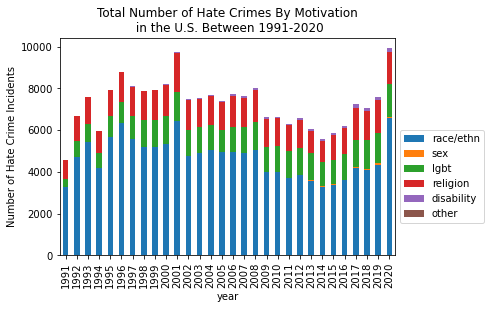

<Figure size 216x216 with 0 Axes>

In [13]:
# rearrange columns of num_bias_hc in order to make box plot
num_bias_hc_t_df = transpose_df(num_bias_hc,bias_cat_dic.keys(), "bias_cat", "num_bias_cat")
num_bias_hc_plt = num_bias_hc_t_df.plot(kind='bar', stacked=True)
num_bias_hc_plt.set(xlabel = "year", ylabel = "Number of Hate Crime Incidents",
                title = "Total Number of Hate Crimes By Motivation\n in the U.S. Between 1991-2020")
plt.legend(bbox_to_anchor = [1, 0.6])
plt.figure(figsize=(3, 3))
plt.savefig("US_num_bias_hc_plt.png")

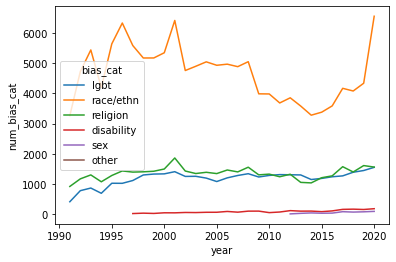

In [14]:
# Plot of each type of bias's raw num over time
num_bias_hc_plt = sns.lineplot(data = num_bias_hc[["year", "num_bias_cat", "bias_cat"]], x = "year", y = "num_bias_cat", hue = "bias_cat")

<AxesSubplot:>

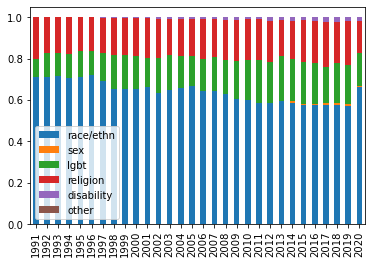

In [15]:
# rearrange columns ofprop_bias_hc in order to make box plot
prop_bias_hc_t_df = transpose_df(num_bias_hc,bias_cat_dic.keys(), "bias_cat", "prop_bias")
prop_bias_hc_t_df.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='year', ylabel='prop_bias'>

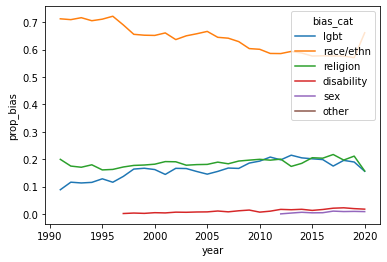

In [16]:
sns.lineplot(data = num_bias_hc, x = "year", y = "prop_bias", hue = "bias_cat")

#### Within race/ethn category, how does racial bias change over time?

In [17]:
# num of each specific racial bias over years
racebias_hc = pd.DataFrame(hc[hc["bias_cat"] == "race/ethn"].groupby(["year", "bias_desc"])["incident_id"].count())
racebias_hc.reset_index(inplace = True)
racebias_hc.columns = ["year", "bias_desc", "num_race_incident"]
racebias_hc["prop_bias"] = racebias_hc["num_race_incident"]/racebias_hc.groupby("year")["num_race_incident"].transform("sum")
racebias_hc

,year,bias_desc,num_race_incident,prop_bias
0,1991,Anti-American Indian or Alaska Native,11,0.003371
1,1991,Anti-Arab,73,0.022372
2,1991,Anti-Asian,269,0.082439
3,1991,Anti-Black or African American,1624,0.497702
4,1991,Anti-Hispanic or Latino,231,0.070794
...,...,...,...,...
239,2020,Anti-Hispanic or Latino,622,0.094759
240,2020,"Anti-Multiple Races, Group",245,0.037325
241,2020,Anti-Native Hawaiian or Other Pacific Islander,29,0.004418
242,2020,Anti-Other Race/Ethnicity/Ancestry,347,0.052864


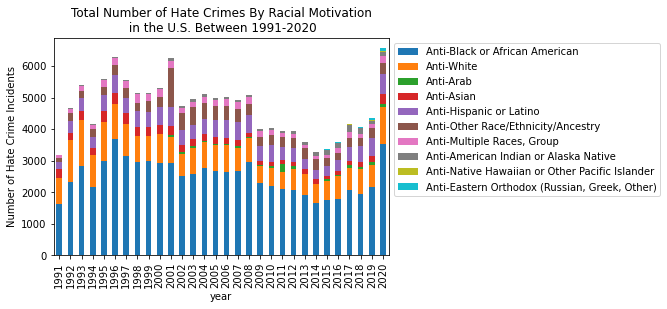

In [18]:
# rearrange columns of num_racebias_hc in order to make box plot
num_racebias_hc_t_df = transpose_df(racebias_hc, bias_cat_dic["race/ethn"], "bias_desc", "num_race_incident")
num_racebias_hc_plt = num_racebias_hc_t_df.plot(kind='bar', stacked=True)
num_racebias_hc_plt.set(xlabel = "year", ylabel = "Number of Hate Crime Incidents",
                title = "Total Number of Hate Crimes By Racial Motivation\n in the U.S. Between 1991-2020")
plt.legend(bbox_to_anchor = [1, 1])
#plt.savefig("US_num_racebias_hc_plt.png")

In [19]:
top_five_race_hc = racebias_hc[racebias_hc["bias_desc"].isin(["Anti-Black or African American", "Anti-White", "Anti-Asian", "Anti-Hispanic or Latino"])]

[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Number of Hate Crime Incidents'),
 Text(0.5, 1.0, 'Number of Hate Crimes By Different Racial Motivation\n in the U.S. Between 1991-2020')]

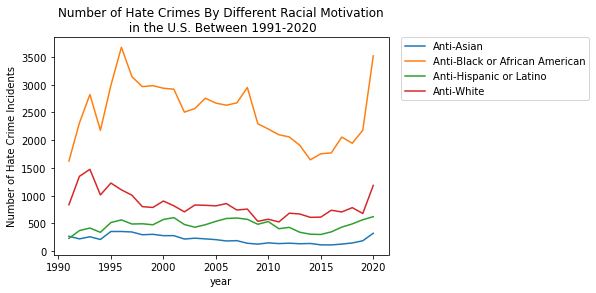

In [20]:
# Plot of each type of bias's raw num over time
racebias_hc_plt = sns.lineplot(data = top_five_race_hc[["year", "num_race_incident", "bias_desc"]], x = "year", y = "num_race_incident", hue = "bias_desc")
racebias_hc_plt.legend(bbox_to_anchor=(1.6, 1), loc="upper right", borderaxespad=0)
racebias_hc_plt.set(xlabel = "year", ylabel = "Number of Hate Crime Incidents",
                title = "Number of Hate Crimes By Different Racial Motivation\n in the U.S. Between 1991-2020")

In [21]:
top_five_race_hc[top_five_race_hc["bias_desc"] == "Anti-Hispanic or Latino"]

,year,bias_desc,num_race_incident,prop_bias
4,1991,Anti-Hispanic or Latino,231,0.070794
12,1992,Anti-Hispanic or Latino,371,0.078469
20,1993,Anti-Hispanic or Latino,417,0.076584
28,1994,Anti-Hispanic or Latino,340,0.080991
36,1995,Anti-Hispanic or Latino,516,0.091360
44,1996,Anti-Hispanic or Latino,564,0.088973
52,1997,Anti-Hispanic or Latino,490,0.087641
60,1998,Anti-Hispanic or Latino,494,0.095404
68,1999,Anti-Hispanic or Latino,476,0.091910
76,2000,Anti-Hispanic or Latino,571,0.106689


[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Number of Hate Crime Incidents'),
 Text(0.5, 1.0, 'Number of Hate Crimes By Different Racial Motivation\n in the U.S. Between 1991-2020')]

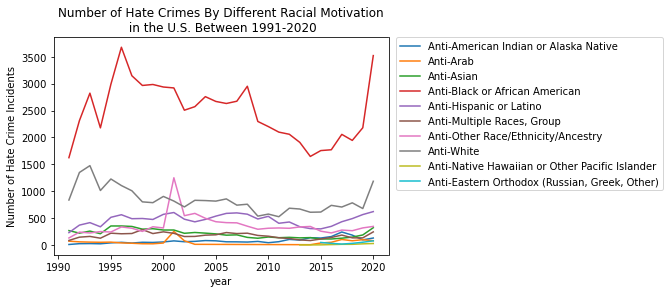

In [22]:
# Plot of each type of bias's raw num over time
racebias_hc_plt = sns.lineplot(data = racebias_hc[["year", "num_race_incident", "bias_desc"]], x = "year", y = "num_race_incident", hue = "bias_desc")
racebias_hc_plt.legend(bbox_to_anchor=(1.82, 1), loc="upper right", borderaxespad=0)
racebias_hc_plt.set(xlabel = "year", ylabel = "Number of Hate Crime Incidents",
                title = "Number of Hate Crimes By Different Racial Motivation\n in the U.S. Between 1991-2020")

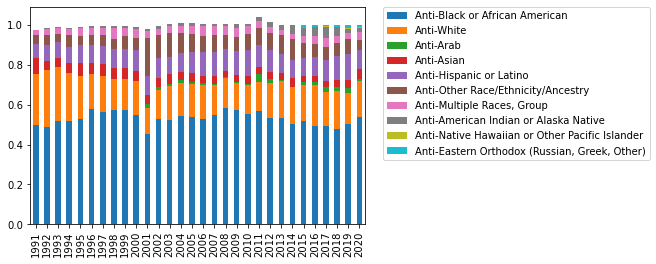

In [23]:
# rearrange columns of prop_racebias_hc in order to make box plot
prop_racebias_hc_t_df = transpose_df(racebias_hc, bias_cat_dic["race/ethn"], "bias_desc", "prop_bias")
prop_racebias_hc_t_df_plt = prop_racebias_hc_t_df.plot(kind='bar', stacked=True)
prop_racebias_hc_t_df_plt.legend(bbox_to_anchor=(1.85, 1), loc="upper right", borderaxespad=0)

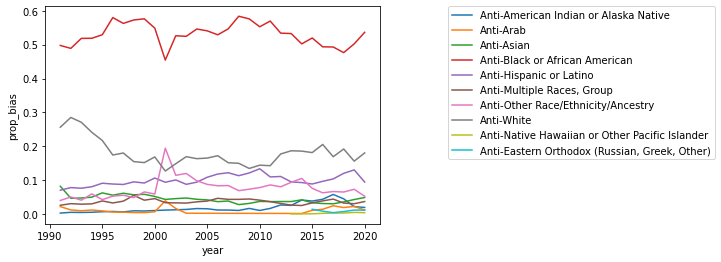

In [24]:
# Plot of each type of bias's raw num over time
racebias_hc_plt = sns.lineplot(data = racebias_hc[["year", "prop_bias", "bias_desc"]], x = "year", y = "prop_bias", hue = "bias_desc")
racebias_hc_plt.legend(bbox_to_anchor=(2, 1), loc="upper right", borderaxespad=0)

### In each state, which bias category are most prevalent?

In [25]:
# total incidence since 1990s of each bias category of each state
state_hc = pd.DataFrame(hc.groupby(["state_abbr", "bias_cat"])["incident_id"].count())
state_hc.reset_index(inplace = True)
state_hc.columns = ["state_name", "bias_cat", "num_bias_incident"]
state_hc["prop_bias"] = state_hc["num_bias_incident"]/state_hc.groupby("state_name")["num_bias_incident"].transform("sum")
state_hc

,state_name,bias_cat,num_bias_incident,prop_bias
0,AK,disability,3,0.012658
1,AK,lgbt,33,0.139241
2,AK,race/ethn,184,0.776371
3,AK,religion,15,0.063291
4,AK,sex,2,0.008439
...,...,...,...,...
507,WV,sex,5,0.005015
508,WY,lgbt,32,0.181818
509,WY,race/ethn,110,0.625000
510,WY,religion,32,0.181818


In [26]:
states = [state[0] for state in hc.groupby("state_abbr")["state_abbr"]]
state_bias = []
most_bias = []
num_incident =[]
for state in states:
    state_df = state_hc[state_hc["state_name"] == state]
    max_num_incident = state_df["num_bias_incident"].max()
    most_bias = list(state_df[state_df["num_bias_incident"] == max_num_incident]["bias_cat"])[0]
    state_bias.append([state, most_bias, max_num_incident])
    
state_bias = pd.DataFrame(state_bias, columns = ["state", "most_bias", "num_incident"])
state_bias

,state,most_bias,num_incident
0,AK,race/ethn,184
1,AL,race/ethn,190
2,AR,race/ethn,889
3,AZ,race/ethn,4382
4,CA,race/ethn,22569
5,CO,race/ethn,2902
6,CT,race/ethn,2299
7,DC,lgbt,888
8,DE,race/ethn,604
9,FL,race/ethn,3424


In [27]:
states = [state[0] for state in hc.groupby("state_abbr")["state_abbr"]]
state_bias = []
most_bias = []
num_incident =[]
for state in states:
    state_df = state_hc[state_hc["state_name"] == state]
    num_incident = list(state_df[state_df["bias_cat"] == "race/ethn"]["num_bias_incident"])[0]
    state_bias.append([state, num_incident])
    
race_state_bias = pd.DataFrame(state_bias, columns = ["state", "num_incident"])
race_state_bias

,state,num_incident
0,AK,184
1,AL,190
2,AR,889
3,AZ,4382
4,CA,22569
5,CO,2902
6,CT,2299
7,DC,693
8,DE,604
9,FL,3424


**Interpretation: Hate crimes in most states are most often due to race/ethnicity**

In [28]:
import folium

In [29]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[40, -95], zoom_start=3.5)
fig = folium.Figure(width = 800, height = 450)
fig.add_child(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_bias,
    columns=["state", "num_incident"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Number of Hate Crime Incidents since 1991",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [30]:
# total incidence since 1990s of each bias category of each state
state_hc_20 = pd.DataFrame(hc[hc["year"] == 2020].groupby(["state_abbr", "bias_cat"])["incident_id"].count())
state_hc_20.reset_index(inplace = True)
state_hc_20.columns = ["state_name", "bias_cat", "num_bias_incident"]
state_hc_20 = state_hc_20[~(state_hc_20["state_name"] == "FS")]

In [31]:
#https://www.census.gov/data/tables/2020/dec/2020-apportionment-data.html
statepop_20 = pd.read_csv("../datasets/2020_statepop.csv")

In [32]:
statepop_20["pop"] = pd.to_numeric(statepop_20["pop"])

In [33]:
race_state_hc_20 = state_hc_20[state_hc_20["bias_cat"] == "race/ethn"]
pop = []
for state in race_state_hc_20["state_name"]:
    pop.append(list(statepop_20[statepop_20["state_abbr"] == state]["pop"])[0])
race_state_hc_20

,state_name,bias_cat,num_bias_incident
1,AK,race/ethn,5
6,AL,race/ethn,21
10,AR,race/ethn,33
19,AZ,race/ethn,198
25,CA,race/ethn,882
33,CO,race/ethn,184
39,CT,race/ethn,61
42,DC,race/ethn,64
45,DE,race/ethn,7
48,FL,race/ethn,65


In [34]:
race_state_hc_20['pop'] = pop
race_state_hc_20['prop'] = race_state_hc_20["num_bias_incident"]/race_state_hc_20["pop"]
race_state_hc_20

<ipython-input-34-494675d71f49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_state_hc_20['pop'] = pop
<ipython-input-34-494675d71f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_state_hc_20['prop'] = race_state_hc_20["num_bias_incident"]/race_state_hc_20["pop"]


,state_name,bias_cat,num_bias_incident,pop,prop
1,AK,race/ethn,5,733391,0.000007
6,AL,race/ethn,21,5024279,0.000004
10,AR,race/ethn,33,3011524,0.000011
19,AZ,race/ethn,198,7151502,0.000028
25,CA,race/ethn,882,39538223,0.000022
33,CO,race/ethn,184,5773714,0.000032
39,CT,race/ethn,61,3605944,0.000017
42,DC,race/ethn,64,689545,0.000093
45,DE,race/ethn,7,989948,0.000007
48,FL,race/ethn,65,21538187,0.000003


In [35]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[40, -95], zoom_start=3.5)
fig = folium.Figure(width = 800, height = 450)
fig.add_child(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=race_state_hc_20,
    columns=["state_name", "num_bias_incident"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Hate Crime Incidents in 2020",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [36]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m = folium.Map(location=[40, -95], zoom_start=3.5)
fig = folium.Figure(width = 800, height = 450)
fig.add_child(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=race_state_hc_20,
    columns=["state_name", "prop"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Proportion of Hate Crime Incidents to Population in 2020",
).add_to(m)

folium.LayerControl().add_to(m)

m

### State -> city in California
Where are the most crimes taking place (e.g. populated cities, rural towns, etc.)?
Use population size to determine urban, sub, rural https://www.california-demographics.com/cities_by_population
- city to county: https://www.statsamerica.org/CityCountyFinder/
- urban, sub, rural: https://www.counties.org/sites/main/files/file-attachments/2020-june3-countycaucusesinfographic-4-final.pdf

In [37]:
# Make a dataframe with just california data
CA_hc = nomix_hc[nomix_hc["state_abbr"] == "CA"]

In [38]:
countypop = pd.read_csv("../datasets/CA_county_population.csv")

In [39]:
county_cat_pop = pd.DataFrame(countypop.groupby("county_cat").sum("pop"))
county_cat_pop.reset_index(inplace = True)
county_cat_pop_dic = {}
for county_cat in county_cat_pop["county_cat"]:
    county_cat_pop_dic[county_cat] = list(county_cat_pop[county_cat_pop["county_cat"] == county_cat]["pop"])[0]
county_cat_pop_dic

{'rural': 1603561, 'suburban': 6184759, 'urban': 31875808}

In [40]:
# Import county to city key
CA_c2c = pd.read_csv("../datasets/2020_CA_city_to_county.csv", )
CA_c2c.head()

,city,county,county_cat
0,Acalanes Ridge,Contra Costa,urban
1,Acampo,San Joaquin,urban
2,Acton,Los Angeles,urban
3,Adelanto,San Bernardino,urban
4,Adin,Modoc,rural


In [41]:
county_cat_dic = {"urban":["Alameda", "Contra Costa", "Fresno", "Los Angeles", "Orange", "Riverside", "Sacramento", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", "San Mateo", "Santa Clara", "Ventura"],
             "suburban":["Butte", "Imperial", "Kern", "Marin", "Merced", "Monterey", "Napa", "Placer", "San Luis Obispo", "Santa Barbara", "Santa Cruz", "Shasta", "Solano", "Sonoma", "Stanislaus", "Tulare", "Yolo"],
             "rural":["Alpine", "Amador", "Calaveras", "Colusa", "Del Norte", "El Dorado", "Glenn", "Humboldt", "Inyo", "Kings", "Lake", "Lassen", "Madera", "Mariposa", "Mendocino", "Modoc", "Mono", "Nevada", "Plumas", "San Benito", "Sierra", "Siskiyou", "Sutter", "Tehama","Trinity","Tuolumne","Yuba"]}

In [42]:
# Annotating whether county is urban, suburban, and rural
county_cat = []
counties = []
city_names = list(CA_c2c["city"])
for city in CA_hc["pub_agency_name"]:
    city = city.strip()
    if city in city_names:
        county_cat.append(list(CA_c2c[CA_c2c["city"]==city]["county_cat"])[0])
        counties.append(list(CA_c2c[CA_c2c["city"]==city]["county"])[0])
    elif city in county_cat_dic["urban"]:
        county_cat.append("urban")
        counties.append(city)
    elif city in county_cat_dic["suburban"]:
        county_cat.append("suburban")
        counties.append(city)
    elif city in county_cat_dic["rural"]:
        county_cat.append("rural")
        counties.append(city)
    else:
        county_cat.append(None)
        counties.append(None)

In [43]:
# Adding county_cat as a column to CA hc dataframe
CA_hc["county_cat"] = county_cat
CA_hc

<ipython-input-43-4a2734534004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_hc["county_cat"] = county_cat


,Unnamed: 0,incident_id,year,pub_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias,bias_cat,county_cat
60,60,48,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S,race/ethn,urban
61,61,49,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S,religion,urban
62,62,50,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S,religion,urban
63,63,51,1991,Garden Grove,City,CA,California,Pacific,West,2,...,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Asian,Individual,S,S,race/ethn,urban
64,64,52,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,race/ethn,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210961,210981,1262584,2020,Davis,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,S,S,race/ethn,suburban
210962,210982,1262585,2020,Davis,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Other Race/Ethnicity/Ancestry,Individual,S,S,race/ethn,suburban
210963,210983,1262634,2020,Woodland,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn,suburban
210964,210984,1262611,2020,Yuba,County,CA,California,Pacific,West,9B,...,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn,rural


In [44]:
CA_county_hc = CA_hc[~CA_hc["county_cat"].isna()]
CA_county_hc

,Unnamed: 0,incident_id,year,pub_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias,bias_cat,county_cat
60,60,48,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S,race/ethn,urban
61,61,49,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S,religion,urban
62,62,50,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S,religion,urban
63,63,51,1991,Garden Grove,City,CA,California,Pacific,West,2,...,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Asian,Individual,S,S,race/ethn,urban
64,64,52,1991,Garden Grove,City,CA,California,Pacific,West,2,...,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,race/ethn,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210961,210981,1262584,2020,Davis,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Residence/Home,Anti-Other Race/Ethnicity/Ancestry,Individual,S,S,race/ethn,suburban
210962,210982,1262585,2020,Davis,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Other Race/Ethnicity/Ancestry,Individual,S,S,race/ethn,suburban
210963,210983,1262634,2020,Woodland,City,CA,California,Pacific,West,3,...,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn,suburban
210964,210984,1262611,2020,Yuba,County,CA,California,Pacific,West,9B,...,1,Destruction/Damage/Vandalism of Property,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,race/ethn,rural


In [45]:
print(len(CA_hc), len(CA_county_hc))

36205 34752


In [46]:
pd.DataFrame(CA_county_hc[["bias_cat", "county_cat"]].groupby("county_cat").count())

,bias_cat
county_cat,
rural,754
suburban,3478
urban,30520


In [47]:
# Create num bias category each year (no mix)
CA_num_bias_hc = pd.DataFrame(CA_county_hc.groupby(["county_cat","year","bias_cat"])["incident_id"].count())
CA_num_bias_hc.reset_index(inplace = True)
CA_num_bias_hc.columns = ["county_cat","year","bias_cat", "num_bias_cat"]
#CA_num_bias_hc["prop_bias"] = CA_num_bias_hc["num_bias_cat"]/CA_num_bias_hc.groupby("year")["num_bias_cat"].transform("sum")
CA_num_bias_hc

,county_cat,year,bias_cat,num_bias_cat
0,rural,1995,lgbt,3
1,rural,1995,race/ethn,15
2,rural,1995,religion,2
3,rural,1996,lgbt,3
4,rural,1996,race/ethn,29
...,...,...,...,...
287,urban,2020,disability,3
288,urban,2020,lgbt,222
289,urban,2020,race/ethn,713
290,urban,2020,religion,147


In [48]:
CA_num_bias_hc[CA_num_bias_hc["county_cat"] == "rural"]

,county_cat,year,bias_cat,num_bias_cat
0,rural,1995,lgbt,3
1,rural,1995,race/ethn,15
2,rural,1995,religion,2
3,rural,1996,lgbt,3
4,rural,1996,race/ethn,29
...,...,...,...,...
75,rural,2019,religion,4
76,rural,2020,disability,1
77,rural,2020,lgbt,7
78,rural,2020,race/ethn,14


<AxesSubplot:>

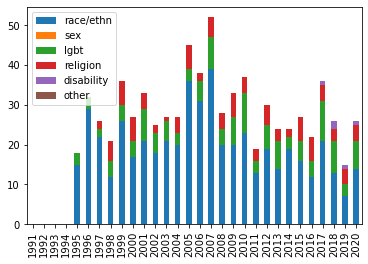

In [49]:
# rearrange columns ofprop_bias_hc in order to make box plot
CA_num_bias_hc_t_df = transpose_df(CA_num_bias_hc[CA_num_bias_hc["county_cat"] == "rural"],bias_cat_dic.keys(), "bias_cat", "num_bias_cat")
CA_num_bias_hc_t_df.plot(kind='bar', stacked=True)

<AxesSubplot:>

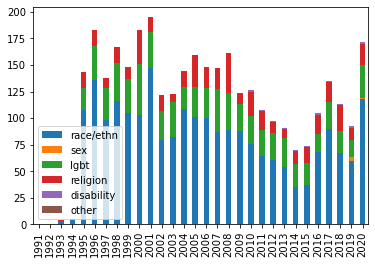

In [50]:
# rearrange columns ofprop_bias_hc in order to make box plot
CA_num_bias_hc_t_df = transpose_df(CA_num_bias_hc[CA_num_bias_hc["county_cat"] == "suburban"],bias_cat_dic.keys(), "bias_cat", "num_bias_cat")
CA_num_bias_hc_t_df.plot(kind='bar', stacked=True)

<AxesSubplot:>

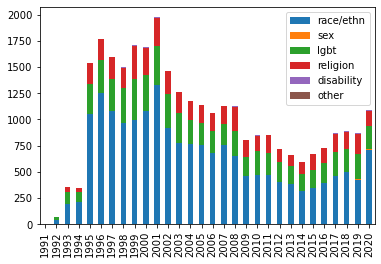

In [51]:
# rearrange columns ofprop_bias_hc in order to make box plot
CA_num_bias_hc_t_df = transpose_df(CA_num_bias_hc[CA_num_bias_hc["county_cat"] == "urban"],bias_cat_dic.keys(), "bias_cat", "num_bias_cat")
CA_num_bias_hc_t_df.plot(kind='bar', stacked=True)

### Interactive visuals
Year by Year animation of CA map of hate crime incidents